# Beispiel 1: Numerische Lösung der Lotka-Volterra Gleichungen 
***Autor:*** Arne Nägel, G-CSC, Uni Frankfurt, ***Datum:*** 24.10.19


Populationen von Beute $x$ und Räubern $y$
\begin{align}
\dot{x} & = (a-b y)x \\
\dot{y} & = -(c -dx)y\\
\end{align}
mit $a,b,c,d>0$ zum Anfangswert $(x_0, y_0)^T$. 

## Lösen der DGL
Definition einer Koeffizientenmatrix 
$$\begin{pmatrix} a & b\\ c& d \end{pmatrix}$$
sowie Vektoren für den stationären Zustands
$$\vec u^* = \begin{pmatrix} x^*\\ y^*\end{pmatrix} = \begin{pmatrix} c/d \\ a/b\end{pmatrix}$$
und 
$$\vec u_0 = \begin{pmatrix} x_0\\ y_0\end{pmatrix} = \begin{pmatrix} 0.1 \\ 1\end{pmatrix}.$$

In [146]:
Coeff =[2 1; 1 3]  
ustat = [Coeff(2,1) / Coeff(2,2); Coeff(1,1)/Coeff(1,2)]
u0=[0.1; 1];   % Falls ein Kommando mit Semikolon beendet wird, erfolgt keine Ausgabe.

Coeff =

   2   1
   1   3

ustat =

   0.33333
   2.00000



Definition der rechten Seite:

In [135]:
function udot=f_rhs(u, t)
    global Coeff
    udot = zeros(2,1);
      
    udot(1) = u(1)*(Coeff(1,1) - Coeff(1,2)*u(2));
    udot(2) = - u(2)*(Coeff(2,1)- Coeff(2,2)*u(1));
endfunction

Definiere mittels `linspace` einen Vektor "times" mit 500 äquidistant verteilten Punkten im Intervall [0,20]. 

In [145]:
times = linspace(0.0, 20.0, 500);

Lösen der DGL mit `lsode`.

In [138]:
numsol  = lsode (@(y,t) f_rhs(y,4,t), u0, times);

## Erzeuge einige Plots

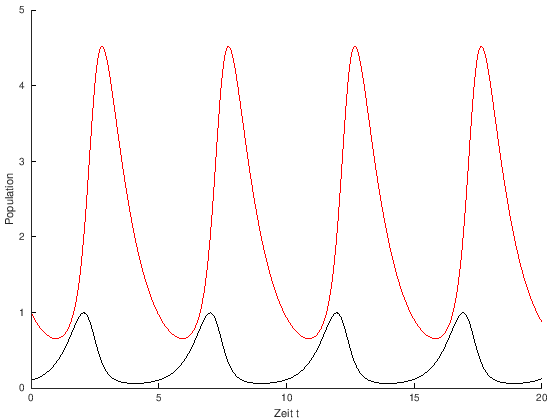

In [139]:
hold on   % 
xlabel('Zeit t')
ylabel('Population')
plot(times, numsol(:,1), 'color', 'black')
plot(times, numsol(:,2), 'color', 'red')

Nun eine Darstellung von Hasen gegen Füchse. 

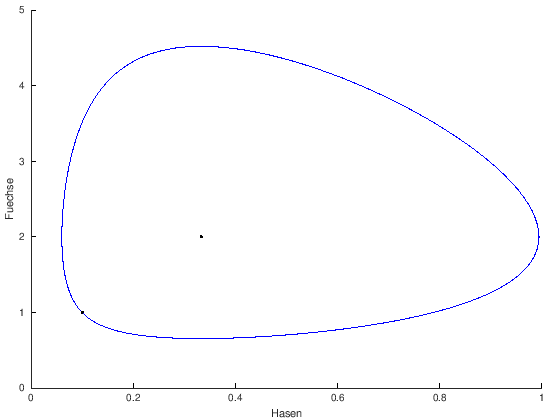

In [140]:
hold on
xlabel('Hasen')
ylabel('Fuechse')
plot(numsol(:,1), numsol(:,2), 'color', 'blue')
plot(ustat(1), ustat(2), 'color', 'black')
plot(u0(1), u0(2), 'color', 'black')

Zuletzt das gleiche mit Vektorfeld:

N =  17
xmax =  0.99443
ymax =  4.5214


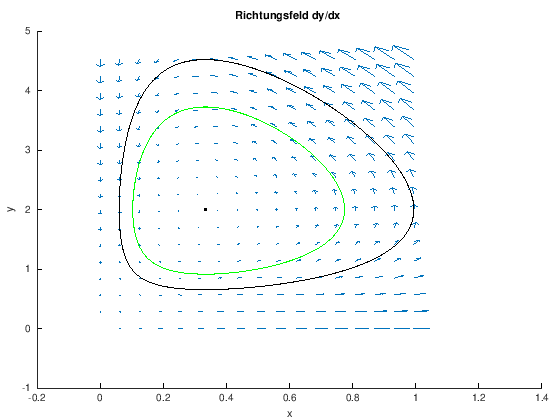

In [143]:

% Erstelle N x N Raster
N = 17 % 17 Punkte = 16 Intervalle

xmax = max(numsol(:,1))
ymax = max(numsol(:,2))

xaxis= linspace(0.0, xmax, N);
yaxis= linspace(0.0, ymax, N);

% Initialisierung
dxRaster = zeros(N);
dyRaster = zeros(N);

% Erstelle eine Matrix mit i,j Indizierung
for i=1:length(yaxis)
for j=1:length(xaxis)
    f = f_rhs([xaxis(j); yaxis(i)], 0);
    dxRaster(i,j) = f(1);
    dyRaster(i,j) = f(2);
end
end

% Eine weitere Lösung zum Anfangswert (0.5, 1)
numsol2 = lsode (@(y,t) f_rhs(y,4,t), [0.5; 1], times); 
 
% Eigentlicher Plot mit quiver (s. help quiver)
hold on
xlabel('x')
ylabel('y')
title ("Richtungsfeld dy/dx ");
quiver (xaxis, yaxis, dxRaster, dyRaster);
plot(numsol(:,1), numsol(:,2), 'color', 'black')
plot(numsol2(:,1), numsol2(:,2), 'color', 'green')
plot(ustat(1), ustat(2), 'color', 'black')

## Bemerkung
* Hilfe zu den Befehlen erhält man mit `help`, z.B. `help plot`. 
* Codezellen unterstützen <TAB>-Expansion.
* Zuletzt: Viel Freude beim Experimentieren!

In [148]:
help plot

'plot' is a function from the file /opt/local/share/octave/5.1.0/m/plot/draw/plot.m

 -- plot (Y)
 -- plot (X, Y)
 -- plot (X, Y, FMT)
 -- plot (..., PROPERTY, VALUE, ...)
 -- plot (X1, Y1, ..., XN, YN)
 -- plot (HAX, ...)
 -- H = plot (...)
     Produce 2-D plots.

     Many different combinations of arguments are possible.  The
     simplest form is

          plot (Y)

     where the argument is taken as the set of Y coordinates and the X
     coordinates are taken to be the range '1:numel (Y)'.

     If more than one argument is given, they are interpreted as

          plot (Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, FMT, ...)

     and so on.  Any number of argument sets may appear.  The X and Y
     values are interpreted as follows:

        * If a single data argument is supplied, it is taken as the set
          of Y coordinates and the X coordinates are taken to be the
          indices of the elements, star